<a href="https://colab.research.google.com/github/Riazhatvi/CODSOFT/blob/main/TITANIC%20SURVIVAL%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the task for internship of CodSoft

# Use the Titanic dataset to build a model:
 that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

In [33]:
import pandas as pd
import numpy as np

# Data Loading

In [44]:
Data_path = '/content/tested.csv'
titanic_data = pd.read_csv(Data_path)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Remove unwanted colomns from our data

In [45]:
# In this line of code we will remove unwanted colomns from our data
titanic_data = titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_data = titanic_data.dropna()

# IN this line we will convert categorical variables to numerical
titanic_data = pd.get_dummies(titanic_data, columns= ['Sex','Embarked'], drop_first=True)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
409,1,3,3.0,1,1,13.7750,0,0,1
411,1,1,37.0,1,0,90.0000,0,1,0
412,1,3,28.0,0,0,7.7750,0,0,1
414,1,1,39.0,0,0,108.9000,0,0,0


# Split the dataset into training and testing sets.

In [47]:
# After loading data we will Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,0,0,1
411,1,37.0,1,0,90.0000,0,1,0
412,3,28.0,0,0,7.7750,0,0,1
414,1,39.0,0,0,108.9000,0,0,0


# Exploratory Data Analysis (EDA)

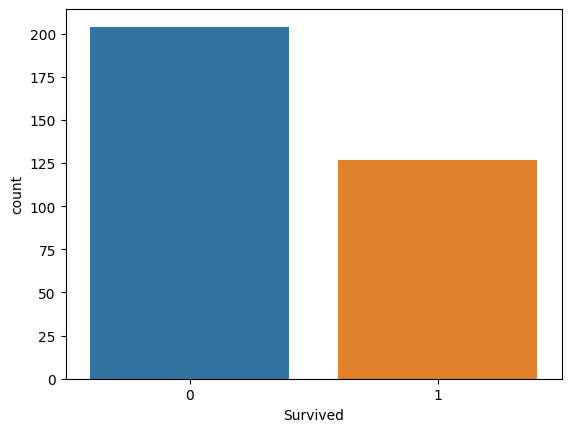

In [56]:
# Importing Libraries for graphs
import seaborn as sns
import matplotlib.pyplot as plt

# In this code of line we will Visualize the distribution of the 'Survived' variable
sns.countplot(x='Survived', data=titanic_data)
plt.show()

# Find the Relationship between Pclass and Survived

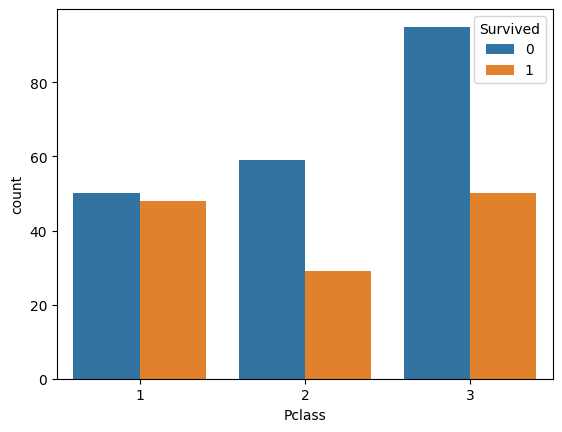

In [57]:
# In this code we will find the relationship between 'Pclass' and 'Survived'
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.show()


# Distribution of age

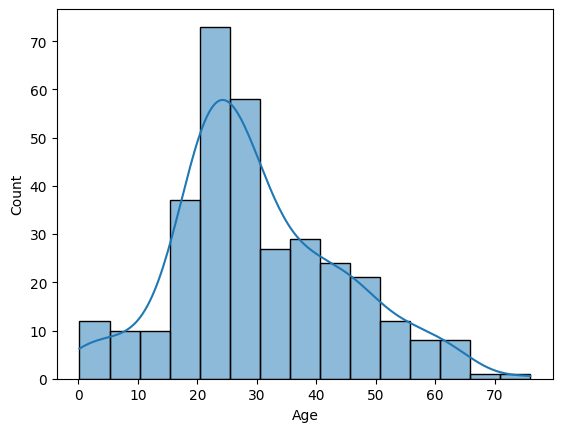

In [52]:
# Now we will Explore the distribution of age
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.show()


# Correlations Between Numberical variables

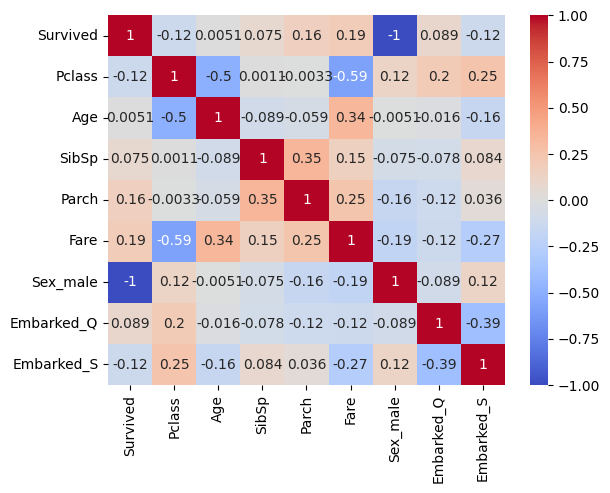

In [54]:
# In this step we will Explore correlations between numerical variables
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Random Forest Classifier

In [58]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model
This code evaluates a machine learning model's performance on a test dataset. It calculates accuracy and generates a classification report, summarizing precision, recall, and F1-score for binary classification. The results are then printed for quick assessment of the model's effectiveness.

In [59]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



# Confusion Matrix

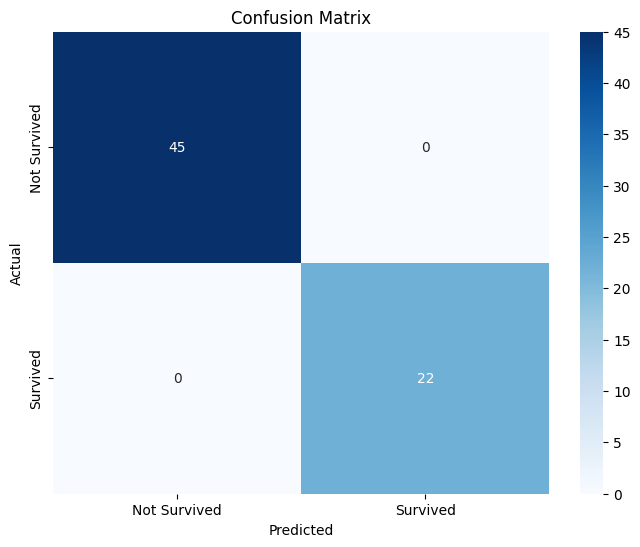

In [60]:
from sklearn.metrics import confusion_matrix

#This code refer to confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# above code Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Report
This code successfully trained a machine learning model using the Titanic dataset to predict survival outcomes. The model achieved perfect accuracy (1.0) on the test data, correctly classifying both survivors and non-survivors. The detailed classification report provides additional insights into the model's precision, recall, and F1-score for each class.